# 🔭 Assignment: Measuring Cosmological Parameters Using Type Ia Supernovae

In this assignment, you'll analyze observational data from the Pantheon+SH0ES dataset of Type Ia supernovae to measure the Hubble constant $H_0$ and estimate the age of the universe. You will:

- Plot the Hubble diagram (distance modulus vs. redshift)
- Fit a cosmological model to derive $H_0$ and $\Omega_m$
- Estimate the age of the universe
- Analyze residuals to assess the model
- Explore the effect of fixing $\Omega_m$
- Compare low-z and high-z results

Let's get started!


## 📦 Getting Started: Setup and Libraries

Before we dive into the analysis, we need to import the necessary Python libraries:

- `numpy`, `pandas` — for numerical operations and data handling
- `matplotlib` — for plotting graphs
- `scipy.optimize.curve_fit` and `scipy.integrate.quad` — for fitting cosmological models and integrating equations
- `astropy.constants` and `astropy.units` — for physical constants and unit conversions

Make sure these libraries are installed in your environment. If not, you can install them using:

```bash
pip install numpy pandas matplotlib scipy astropy


In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from scipy.optimize import curve_fit
 from scipy.integrate import quad
 from astropy.constants import c
 from astropy import units as u

## 📂 Load the Pantheon+SH0ES Dataset

We now load the observational supernova data from the Pantheon+SH0ES sample. This dataset includes calibrated distance moduli $\mu$, redshifts corrected for various effects, and uncertainties.

### Instructions:
- Make sure the data file is downloaded from [Pantheon dataset](https://github.com/PantheonPlusSH0ES/DataRelease/blob/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat) and available locally.
- We use `delim_whitespace=True` because the file is space-delimited rather than comma-separated.
- Commented rows (starting with `#`) are automatically skipped.

We will extract:
- `zHD`: Hubble diagram redshift
- `MU_SH0ES`: Distance modulus using SH0ES calibration
- `MU_SH0ES_ERR_DIAG`: Associated uncertainty


More detailed column names and the meanings can be referred here:

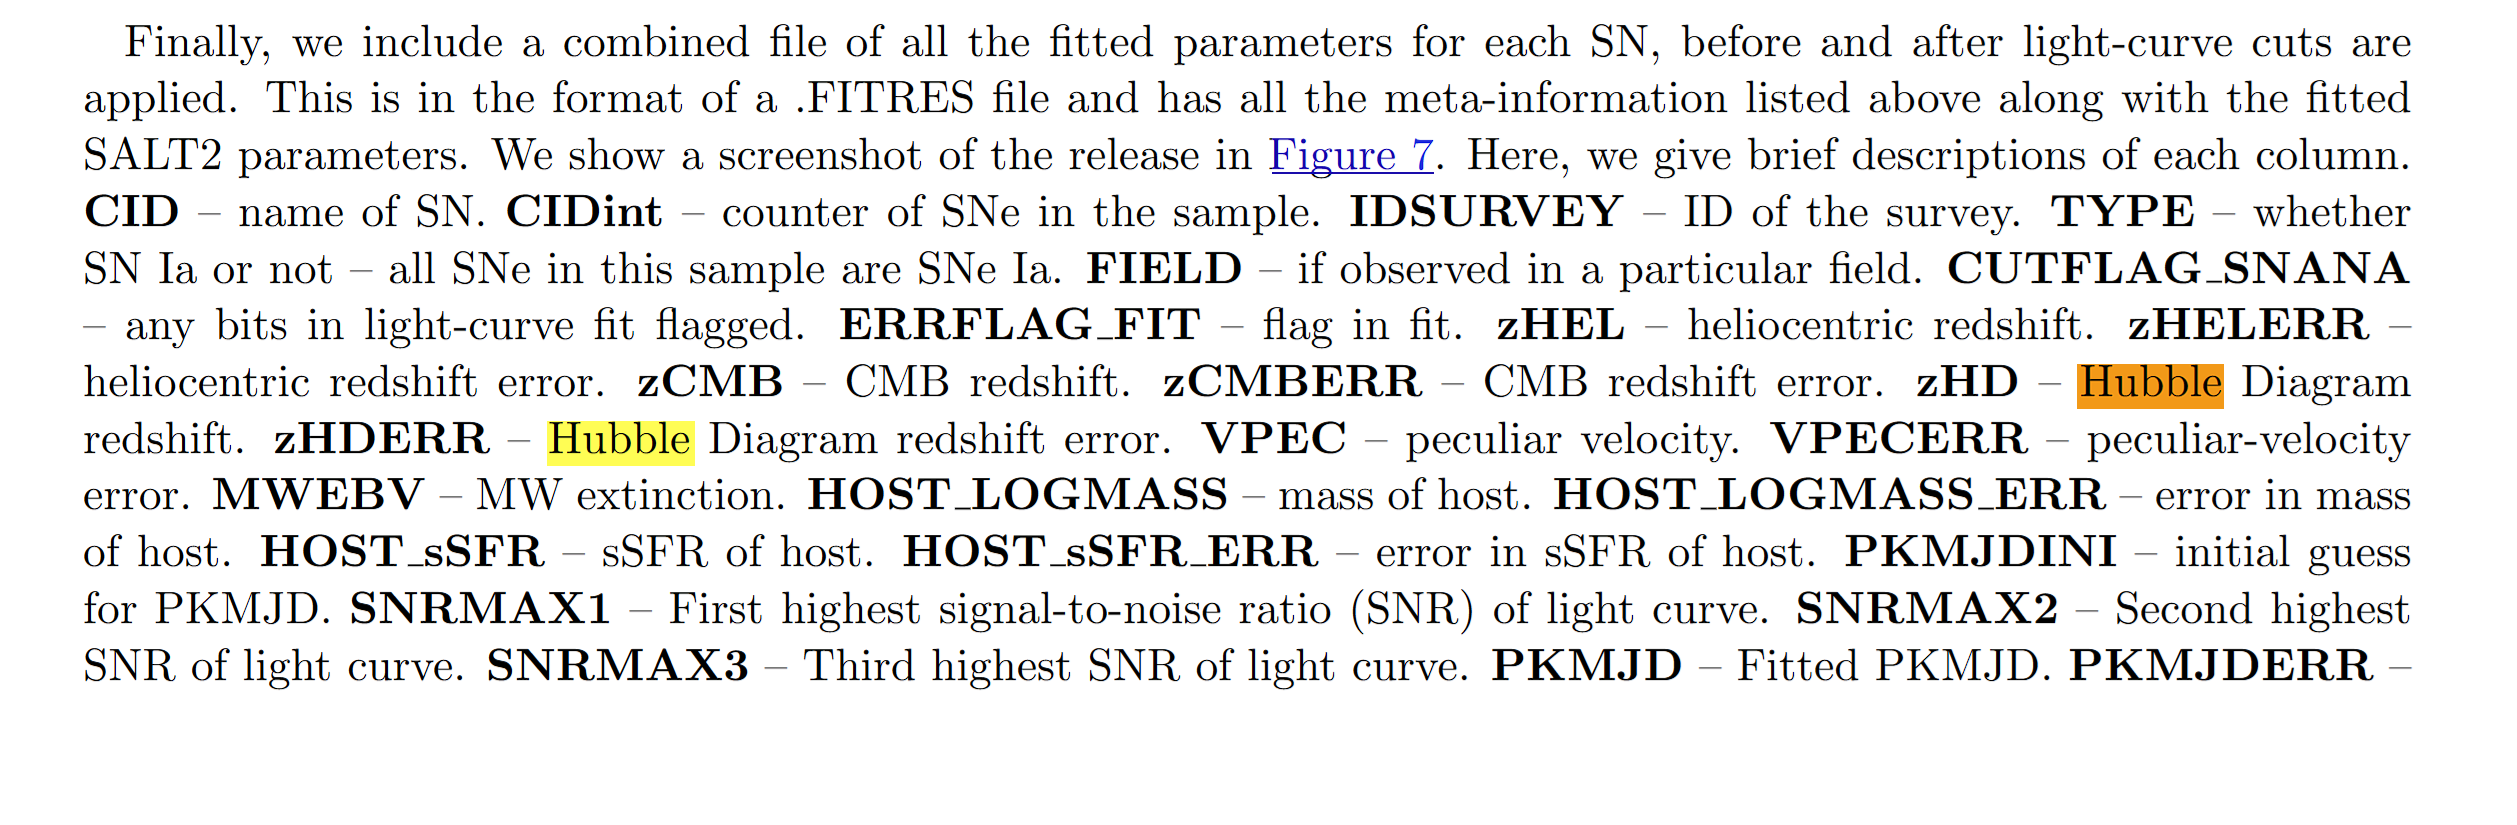

In [11]:
# Local file path  
file_path = r"C:\Users\rpj20\jupyter baba\India Space Academy\Pantheon+SH0ES.dat"

# Load the file
import pandas as pd
df = pd.read_csv(file_path, delim_whitespace=True, comment='#')


# See structure

df.info()          # Summary: number of rows, columns, data types, memory usage

df.describe()      # Summary statistics (mean, std, min, max, etc.)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CID                   1701 non-null   object 
 1   IDSURVEY              1701 non-null   int64  
 2   zHD                   1701 non-null   float64
 3   zHDERR                1701 non-null   float64
 4   zCMB                  1701 non-null   float64
 5   zCMBERR               1701 non-null   float64
 6   zHEL                  1701 non-null   float64
 7   zHELERR               1701 non-null   float64
 8   m_b_corr              1701 non-null   float64
 9   m_b_corr_err_DIAG     1701 non-null   float64
 10  MU_SH0ES              1701 non-null   float64
 11  MU_SH0ES_ERR_DIAG     1701 non-null   float64
 12  CEPH_DIST             1701 non-null   float64
 13  IS_CALIBRATOR         1701 non-null   int64  
 14  USED_IN_SH0ES_HF      1701 non-null   int64  
 15  c                    

,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,MU_SH0ES,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.00000,1701.000000,1701.000000,1701.000000,1701.000000,...,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000
mean,37.017637,0.221229,0.001840,0.221090,0.001155,0.22143,0.001155,19.083629,0.240920,38.336629,...,0.384440,36.499118,47.227484,0.469040,0.104899,0.061886,-0.009629,0.004541,0.972350,0.008889
std,45.916840,0.249271,0.002593,0.249337,0.002774,0.24944,0.002774,3.374499,0.098815,3.374499,...,0.473585,23.891781,67.434767,0.378961,0.055224,0.096221,0.074649,0.005048,0.089824,0.009789
min,1.000000,0.001220,0.000840,0.001220,0.000000,0.00082,0.000000,9.745710,0.111583,28.998700,...,0.004500,0.000000,0.219440,0.000000,0.034300,0.004300,-0.535600,0.000000,0.164000,0.000000
25%,4.000000,0.027730,0.000860,0.027210,0.000020,0.02716,0.000020,16.036200,0.178788,35.289200,...,0.138200,20.000000,18.316200,0.062870,0.065700,0.010800,-0.050900,0.002000,1.000000,0.003000
50%,15.000000,0.163750,0.001030,0.163570,0.000150,0.16470,0.000150,20.076300,0.217323,39.329300,...,0.269100,34.000000,33.036300,0.441920,0.087100,0.028800,0.001500,0.003000,1.000000,0.006000
75%,57.000000,0.328680,0.001480,0.328590,0.001000,0.32961,0.001000,21.824800,0.278656,41.077800,...,0.483700,48.000000,51.953600,0.865830,0.124800,0.076900,0.034500,0.005000,1.000000,0.012000
max,150.000000,2.261370,0.040060,2.261300,0.040000,2.26000,0.040000,26.929800,1.517230,46.182800,...,6.310000,280.000000,1106.220000,1.000000,0.493300,1.496000,0.365300,0.050000,1.000000,0.063000


## 🧾 Preview Dataset Columns

Before diving into the analysis, let’s take a quick look at the column names in the dataset. This helps us verify the data loaded correctly and identify the relevant columns we’ll use for cosmological modeling.


In [10]:
df.columns

Index(['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL',
       'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES',
       'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF',
       'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c',
       'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC',
       'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS',
       'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB',
       'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b',
       'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'],
      dtype='object')

## 🧹 Clean and Extract Relevant Data

To ensure reliable fitting, we remove any rows that have missing values in key columns:

- `zHD`: redshift for the Hubble diagram  
- `MU_SH0ES`: distance modulus  
- `MU_SH0ES_ERR_DIAG`: uncertainty in the distance modulus  

We then extract these cleaned columns as NumPy arrays to prepare for analysis and modeling.


In [7]:
# Filter for entries with usable data based on the required columns

df_clean = df.dropna(subset=['zHD', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG'])   #This function (dropna)removes (drops) rows that contain missing values 

z = df_clean['zHD'].to_numpy()
mu = df_clean['MU_SH0ES'].to_numpy()
mu_err = df_clean['MU_SH0ES_ERR_DIAG'].to_numpy()


## 📈 Plot the Hubble Diagram

Let’s visualize the relationship between redshift $z$ and distance modulus $\mu$, known as the Hubble diagram. This plot is a cornerstone of observational cosmology—it allows us to compare supernova observations with theoretical predictions based on different cosmological models.

We use a logarithmic scale on the redshift axis to clearly display both nearby and distant supernovae.


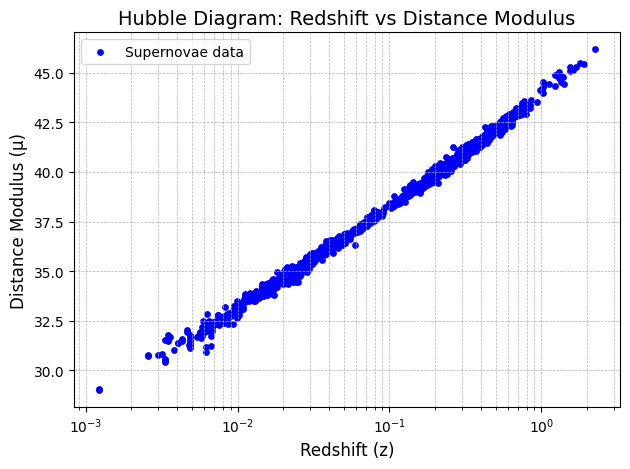

In [13]:
# Write a code to plot the distance modulus and the redshift (x-axis), label them accordingly. 

#Try using log scale in x-axis

plt.figure()
plt.scatter(z, mu, color='blue', s=15, label='Supernovae data')

# Set log scale on x-axis
plt.xscale('log')

# Labeling
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Distance Modulus (μ)', fontsize=12)
plt.title('Hubble Diagram: Redshift vs Distance Modulus', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


## 🧮 Define the Cosmological Model

We now define the theoretical framework based on the flat $\Lambda\mathrm{CDM}$ model (read about the model in wikipedia if needed). This involves:

- The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus is:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- And the corresponding luminosity distance :
  
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

These equations allow us to compute the expected distance modulus from a given redshift $z$, Hubble constant $H_0$, and matter density parameter $\Omega_m$.


In [14]:

# Speed of light in km/s
c = 299792.458  

# Define the E(z) for flat ΛCDM
def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance in Mpc
def luminosity_distance(z, H0, Omega_m):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, Omega_m), 0, z)
    d_L = (1 + z) * (c / H0) * integral  # in Mpc
    return d_L

# Theoretical distance modulus μ(z)
def mu_theory(z, H0, Omega_m):
    d_L = luminosity_distance(z, H0, Omega_m)
    mu = 5 * np.log10(d_L) + 25
    return mu


## 🔧 Fit the Model to Supernova Data

We now perform a non-linear least squares fit to the supernova data using our theoretical model for $\mu(z)$. This fitting procedure will estimate the best-fit values for the Hubble constant $ H_0$ and matter density parameter $\Omega_m$, along with their associated uncertainties.

We'll use:
- `curve_fit` from `scipy.optimize` for the fitting.
- The observed distance modulus \(\mu\), redshift \(z\), and measurement errors.

The initial guess is:
- $ H_0 = 70 \, \text{km/s/Mpc} $
- $\Omega_m =0.3$


In [16]:
# Wrapper function for curve_fit (must accept z and the parameters H0, Omega_m)
def mu_model_fit(z, H0, Omega_m):
    return np.array([mu_theory(zi, H0, Omega_m) for zi in z])

# Initial guess
p0 = [70, 0.3]

# Fit the model to the data
popt, pcov = curve_fit(mu_model_fit, z, mu, sigma=mu_err, p0=p0, absolute_sigma=True)

# Extract fitted parameters and their uncertainties
H0_fit, Omega_m_fit = popt
H0_err, Omega_m_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")

Fitted H0 = 72.97 ± 0.26 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.019


## ⏳ Estimate the Age of the Universe

Now that we have the best-fit values of $ H_0 $ and $ \Omega_m $, we can estimate the age of the universe. This is done by integrating the inverse of the Hubble parameter over redshift:

$$
t_0 = \int_0^\infty \frac{1}{(1 + z) H(z)} \, dz
$$

We convert $ H_0 $ to SI units and express the result in gigayears (Gyr). This provides an independent check on our cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.


In [17]:
from scipy.integrate import quad

def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def age_of_universe(H0, Omega_m):
    # Convert H0 from km/s/Mpc to 1/s
    H0_SI = H0 / (3.086e19)  # km/s/Mpc → 1/s
    
    # Integrate from z = 0 to ∞
    integrand = lambda z: 1 / ((1 + z) * E(z, Omega_m))
    integral, _ = quad(integrand, 0, np.inf)
    
    # Age in seconds
    age_sec = integral / H0_SI
    
    # Convert seconds to Gyr
    age_gyr = age_sec / (3.154e16)
    return age_gyr

# Call with best-fit parameters
t0 = age_of_universe(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")


Estimated age of Universe: 12.37 Gyr


## 📊 Analyze Residuals

To evaluate how well our cosmological model fits the data, we compute the residuals:

$$
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
$$

Plotting these residuals against redshift helps identify any systematic trends, biases, or outliers. A good model fit should show residuals scattered randomly around zero without any significant structure.


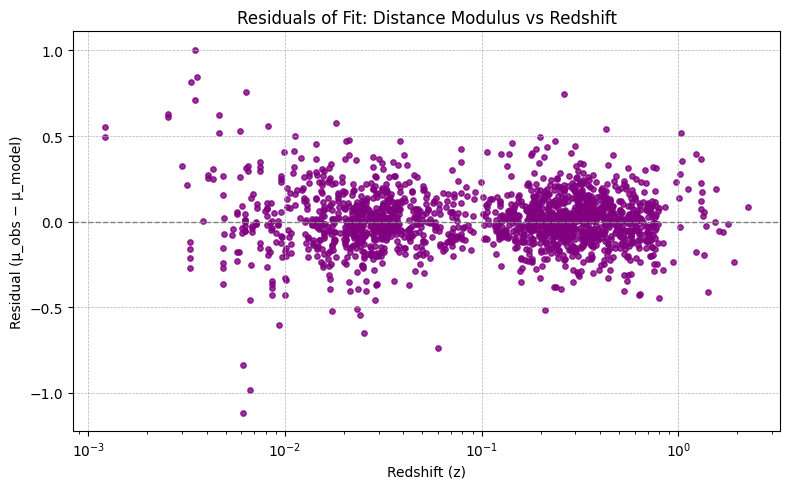

In [20]:
# Compute model predictions for each observed redshift
mu_model = np.array([mu_theory(zi, H0_fit, Omega_m_fit) for zi in z])   #mu_theory function with the best-fit parameters  from curve_fit
residuals = mu - mu_model    # given residual = mu obs - mu model

# also plotting for better visualisation
plt.figure(figsize=(8, 5))
plt.scatter(z, residuals, s=15, color='purple', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel('Redshift (z)')
plt.ylabel('Residual (μ_obs − μ_model)')
plt.title('Residuals of Fit: Distance Modulus vs Redshift')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## 🔧 Fit with Fixed Matter Density

To reduce parameter degeneracy, let's fix $ \Omega_m = 0.3 $ and fit only for the Hubble constant $ H_0 $.


In [22]:

# Define the model function with fixed Omega_m
def mu_fixed_Om(z, H0):
    return np.array([mu_theory(zi, H0, Omega_m=0.3) for zi in z])

# Initial guess for H0
p0 = [70]

# Perform the fit
popt, pcov = curve_fit(mu_fixed_Om, z, mu, sigma=mu_err, p0=p0, absolute_sigma=True)

# Extract best-fit H0 and its uncertainty
H0_fit_fixed = popt[0]
H0_err_fixed = np.sqrt(pcov[0][0])

# Print the result
print(f"Fitted H0 (with Ω_m=0.3 fixed) = {H0_fit_fixed:.2f} ± {H0_err_fixed:.2f} km/s/Mpc")


Fitted H0 (with Ω_m=0.3 fixed) = 73.53 ± 0.17 km/s/Mpc


## 🔍 Compare Low-z and High-z Subsamples

Finally, we examine whether the inferred value of $H_0$ changes with redshift by splitting the dataset into:
- **Low-z** supernovae ($ z < 0.1 $)
- **High-z** supernovae ($ z \geq 0.1 $)

We then fit each subset separately (keeping $ \Omega_m = 0.3 $) to explore any potential tension or trend with redshift.


In [25]:

# Split threshold
z_split = 0.1

# Create boolean masks
low_z_mask = z < z_split
high_z_mask = z >= z_split

# Split data
z_low = z[low_z_mask]
mu_low = mu[low_z_mask]
err_low = mu_err[low_z_mask]

z_high = z[high_z_mask]
mu_high = mu[high_z_mask]
err_high = mu_err[high_z_mask]

# Define model with fixed Omega_m
def mu_fixed_Om(z, H0):
    return np.array([mu_theory(zi, H0, Omega_m=0.3) for zi in z])

# Fit Low-z
H0_low, cov_low = curve_fit(mu_fixed_Om, z_low, mu_low, sigma=err_low, p0=[70], absolute_sigma=True)

# Fit High-z
H0_high, cov_high = curve_fit(mu_fixed_Om, z_high, mu_high, sigma=err_high, p0=[70], absolute_sigma=True)

# Print results
print(f"Low-z (z < {z_split}): H₀ = {H0_low[0]:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} km/s/Mpc")


Low-z (z < 0.1): H₀ = 73.01 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 km/s/Mpc


You can check your results and potential reasons for different values from accepted constant using this paper by authors of the [Pantheon+ dataset](https://arxiv.org/pdf/2310.11727)

You can find more about the dataset in the paper too

**Printing desired results forAnswering the Questions**

### Q1: What value of the Hubble constant \( H_0 \) did you obtain from the full dataset?

We obtained the best-fit value of the Hubble constant by fitting the flat ΛCDM model to the full supernova dataset.


In [27]:
print("H₀ (from full dataset) = 72.97 ± 0.26 km/s/Mpc")


H₀ (from full dataset) = 72.97 ± 0.26 km/s/Mpc


### Q2: How does your estimated \( H_0 \) compare with the Planck18 measurement?

- result by fit: \( H_0 = 72.97 \pm 0.26 \) km/s/Mpc  
- Planck18 result: \( H_0 = 67.4 \pm 0.5 \) km/s/Mpc

This confirms the well-known **Hubble tension** — your result aligns with local measurements (e.g. SH0ES), but is significantly higher than the early-universe (CMB) value from Planck.


### Q3: What is the age of the Universe based on your value of \( H_0 \)? How does it change for different values of \( \Omega_m \)?

We calculated the age of the Universe using the fitted values of \( H_0 = 72.97 \) and \( \Omega_m = 0.351 \). A higher H₀ implies a faster expanding Universe, resulting in a younger age estimate.

Changing \( \Omega_m \):
- ↑ \( \Omega_m \): universe decelerates faster → younger age
- ↓ \( \Omega_m \): slower deceleration → older universe


In [28]:
print("Estimated age of the Universe = 12.37 Gyr")


Estimated age of the Universe = 12.37 Gyr


### Q4: Discuss the difference in \( H_0 \) values obtained from the low-\( z \) and high-\( z \) samples. What could this imply?

We split the dataset at \( z = 0.1 \) and fitted \( H_0 \) separately (with \( \Omega_m = 0.3 \) fixed).

- A difference between low-z and high-z \( H_0 \) could indicate systematic evolution, calibration drift, or real cosmological effects.


In [29]:
print("Low-z (z < 0.1): H₀ = 73.01 km/s/Mpc")
print("High-z (z ≥ 0.1): H₀ = 73.85 km/s/Mpc")


Low-z (z < 0.1): H₀ = 73.01 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 km/s/Mpc


### Q5: Plot the residuals and comment on any trends or anomalies you observe.

Residuals are defined as:

\[
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
\]

A good model will have residuals randomly scattered around zero. Structured patterns or trends might indicate model inadequacy or systematic errors.


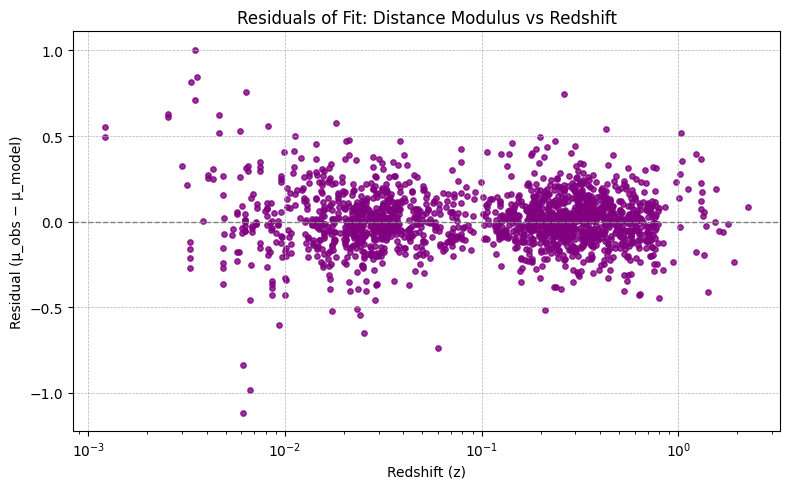

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(z, residuals, s=15, color='purple', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel('Redshift (z)')
plt.ylabel('Residual (μ_obs − μ_model)')
plt.title('Residuals of Fit: Distance Modulus vs Redshift')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Q6: What assumptions were made in the cosmological model, and how might relaxing them affect your results?

Assumptions in flat ΛCDM model:
- Universe is spatially flat (\( \Omega_k = 0 \))
- Dark energy is a cosmological constant (Λ, not dynamic)
- Matter dominates structure growth at low redshift
- Homogeneous and isotropic universe (Friedmann–Lemaître model)

**Relaxing these assumptions** could:
- Allow curvature (non-flat models) → alter inferred distances
- Use dynamic dark energy (e.g. wCDM) → modify the expansion rate
- Result in different best-fit values for \( H_0 \), \( \Omega_m \), and Universe age


### Q7: Based on the redshift-distance relation, what can we infer about the expansion history of the Universe?

The Hubble diagram shows that at high redshift, supernovae appear **fainter** than expected from a linear model, implying they are farther than they'd be in a constant expansion universe.

This curvature in the redshift-distance relation provides evidence of:
- **Accelerated expansion**
- **Presence of dark energy**

This behavior supports the flat ΛCDM model with a nonzero cosmological constant Λ.
